<img src="cropped-SummerWorkshop_Header.png">  

<h1 align="center">SWDB, August 19-September 2, 2018</h1> 
<h3 align="center"></h3> 

<h1 align="center"> Dataset 3: Neuropixels Extracellular Electrophysiology</h1> 
<h3 align="center">Wednesday, August 22, 2018</h3> 
# <img src="neuropixels.png" height="250" width="250">  


This notebook will introduce you to Neuropixels spiking datasets. We will describe the basic structure of the data and then walk through basic analysis methods for accesssing, analyzing, and visualizing spike train data.

** Datasets:**
* extracellular action potential recordings
* populations of single neurons in mouse brain
* passive visual stimulation in awake mouse
* battery of stimuli including drifting gratings and natural scenes

Note:
These pre-release datasets collecting during piloting for our new Ephys Brain Observatory. Pipeline data collection has just started (August 2018) and production data will be released online in 2019. 

** Today's Agenda:**
1. Overview of Neuropixels spiking datasets    
2. Analysis and visualization of stimulus-evoked activity
3. Correlations and cross-correlogram
4. Waveform and spike pattern analysis for cell classification
5. Project ideas

## Drive path and imports

In [1]:
#make sure your drive path is correct! 
# macOS/OS X
#drive_path = '/Volumes/Brain2017/data/dynamic-brain-workshop/brain_observatory_cache/'

# Windows (a good guess)
# drive_path = 'e:/data/dynamic-brain-workshop/brain_observatory_cache'

# Linux (will vary; the following is possibly what Ubuntu will do)
# drive_path = '/media/Brain2017/data/dynamic-brain-workshop/brain_observatory_cache'

# AWS
# drive_path = '/data/dynamic-brain-workshop/brain_observatory_cache/'

#AIBS
drive_path = '/allen/aibs/informatics/swdb2018/visual_coding_neuropixels/'

In [2]:
# We need to import these modules to get started
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Overview of datasets

** Brain areas:**
* Single-probe experiments: VISp
* Multi-probe experiments: VIPp + higher visual areas (VISam, VISpm, VISrl, VISl, VISal)

** Visual stimuli:**
* Passive visual stimulation using Brain Observatory - Visual Coding 1.1, 1.2 stimulus set

In [3]:
# Dataframe with table of metadata describing each experiment.
# Each row represents one dataset
df = pd.read_csv(os.path.join(drive_path,'ecephys_manifest.csv'))
df

,nwb_filename,experiment_type,VISp,VISal,VISam,VISlm,VISpm,VISrl,locally_sparse_noise,gabor,drifting_gratings,static_gratings,natural_images,natural_movie_3,full_field_flashes
0,nwb_M14_actual_ds2.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
1,nwb_M15_actual_ds2.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
2,nwb_M16_actual_ds2.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
3,nwb_M39_actual_ds2.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
4,nwb_M51_actual_ds2.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
5,mouse372584_probe_surf_bob.nwb,multi_probe,True,True,True,True,True,True,True,True,True,True,True,True,True


In [4]:
# Make new dataframe by selecting only single-probe experiments
df1 = df[df.experiment_type == 'single_probe']

print('Number of single-probe experiments: %s') %len(df1)
df1

Number of single-probe experiments: 5


,nwb_filename,experiment_type,VISp,VISal,VISam,VISlm,VISpm,VISrl,locally_sparse_noise,gabor,drifting_gratings,static_gratings,natural_images,natural_movie_3,full_field_flashes
0,nwb_M14_actual_ds2.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
1,nwb_M15_actual_ds2.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
2,nwb_M16_actual_ds2.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
3,nwb_M39_actual_ds2.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
4,nwb_M51_actual_ds2.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True


**Task X.X:** Make a dataframe for 'multi-probe' experiments. 

**Task X.X:** How many multi-probe experiments?

### Load dataset for one multi-probe experiment using NWB file adapter

* Datasets are stored as NWB1.0 files which is based on HDF5 file format
* To facilitate access to these files we have built a light-weight adapter object (NWB_adapter)
* The NWB_adapter provides easy access to unit spike times and stimulus presentation metadata

In [5]:
# Temporary 
#sys.path.append("/Users/shawn/Dropbox/PythonCode/ephys_swdb2018")
from ephys_nwb_adapter import NWB_adapter
%load_ext autoreload
%autoreload 2

/home/rami/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
# Import NWB_adapter (consider changing name to EphysDataset??)
from swdb_2018_neuropixels.ephys_nwb_adapter import NWB_adapter

In [7]:
# Temporary - NWB_file names should come from manifest dataframe
nwb_file = os.path.join(drive_path,'mouse372584_probe_surf_bob.nwb')
#nwb_file = os.path.join(drive_path,'nwb_M15_actual_ds2.nwb')

In [8]:
data_set = NWB_adapter(nwb_file)

In [9]:
data_set.stim_tables.keys()

['natural_movie_3',
 u'dense_noise_8deg_2',
 'gabor',
 u'locally_sparse_noise_4deg_0',
 'drifting_gratings',
 u'locally_sparse_noise_8deg_1',
 u'spontaneous',
 'static_gratings',
 'natural_scenes']

In [10]:
stim_table = data_set.stim_tables['natural_scenes']

In [11]:
stim_table.head()

,start,end,frame
0,6342.87692,6343.14141,30.0
1,6343.14141,6343.39195,98.0
2,6343.39195,6343.64130,52.0
3,6343.64130,6343.89175,110.0
4,6343.89175,6344.14246,79.0


**Task X.X:** What are the attributes of the data_set object?

In [12]:
data_set.__dict__.keys()

['stim_blocks',
 'region_list',
 'number_cells',
 'spike_times',
 'stim_list',
 'unit_list',
 'nwb_path',
 'probe_list',
 'stim_tables']

**Task X.X:** Which area has the most recorded units in this experiment?

In [13]:
data_set.number_cells

{'VISal': 169, 'VISam': 39, 'VISl': 91, 'VISp': 99, 'VISpm': 218, 'VISrl': 123}

### Spike times

#### spike_times is a dictionary with areas as keys

In [14]:
# Get all spike times from V1 units
v1_spikes = data_set.spike_times['VISp']

In [15]:
# v1_spikes is a dictionary with unit IDs as keys
v1_spikes.keys()[:5]

['213', '130', '135', '24', '29']

** Task X.X:** How many units were recorded in V1 in this experiment?

#### unit_list stores unit IDs for each area

In [16]:
# List of all units recorded in V1
v1_unit_list = data_set.unit_list['VISp']
print(v1_unit_list[:20]) # print unit ID for first 20 units

['213' '130' '135' '24' '29' '120' '52' '297' '319' '318' '313' '312'
 '311' '310' '317' '193' '192' '271' '88' '110']


#### Get spike times from single unit in V1

In [17]:
spikes = v1_spikes[v1_unit_list[0]]
spikes[:20]

array([ 83.56477384,  86.57951547,  86.68798244,  88.586021  ,
        88.93362196,  89.05875564,  89.22075608,  92.55973194,
        93.01649987,  93.41710097,  93.60956817,  95.97974136,
        98.34341454, 100.85415478, 101.23785584, 101.48322318,
       102.71109323, 105.6784014 , 110.59888162, 112.06475232])

### Raster plot of spikes over session

#### Plot spike times from 1 neuron

Text(0.5,1,u'Spike train for 1 unit over first 10 minutes of experimental session')

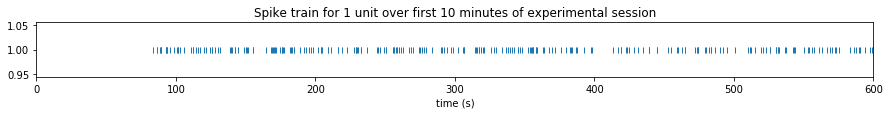

In [18]:
# Make raster plot of single unit spike train for first 600 seconds of recording
fig,ax = plt.subplots(1,1,figsize=(15,1))
ax.plot(spikes,np.ones_like(spikes),'|')
ax.set_xlim(0,600)

ax.set_xlabel('time (s)')
ax.set_title('Spike train for 1 unit over first 10 minutes of experimental session')

** Task X.X**  Plot spike train for last 500 seconds of recording.

#### Plot spike times from 50 neurons

In [19]:
v1_unit_list[:50]

array(['213', '130', '135', '24', '29', '120', '52', '297', '319', '318',
       '313', '312', '311', '310', '317', '193', '192', '271', '88',
       '110', '113', '112', '119', '308', '309', 'noise', '302', '303',
       '304', '305', '306', '307', '245', '243', '242', '102', '103',
       '101', '106', '38', '32', '31', '30', '35', '338', '335', '334',
       '337', '336', '331'], dtype='|S6')

Text(0.5,1,u'Spike train for 50 units over first 10 minutes of experimental session')

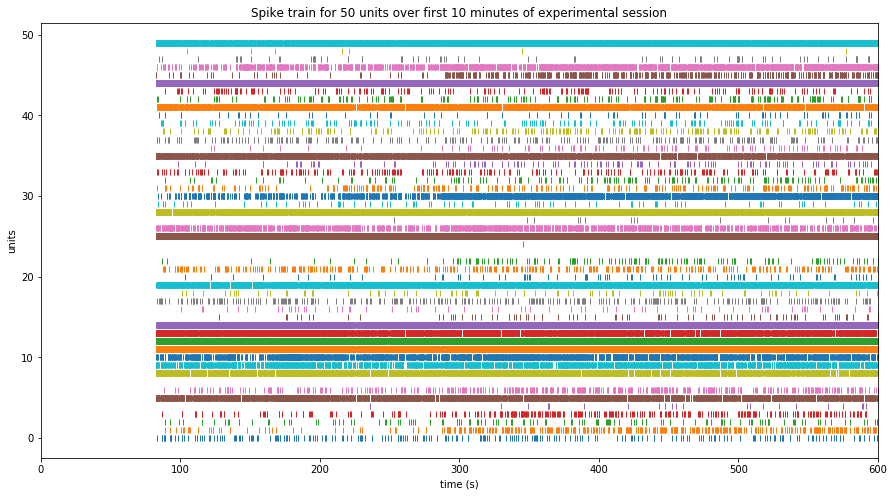

In [20]:
# Figure setup
fig,ax = plt.subplots(1,1)
fig.set_size_inches(15,8)

# Loop through list of spike times from each unit and plot at different y-values
for i,unit in enumerate(v1_unit_list[:50]):
    spike_times = v1_spikes[unit]
    ax.plot(spike_times,i*np.ones_like(spike_times),'|')
plt.xlim(0,600)

ax.set_ylabel('units')
ax.set_xlabel('time (s)')
ax.set_title('Spike train for 50 units over first 10 minutes of experimental session')

** Exercise X.X:** Make series of rasters plots showing spiking activity from 20 units recordings in each of the 6 visual cortical areas.

Text(0,0.5,u'Units')

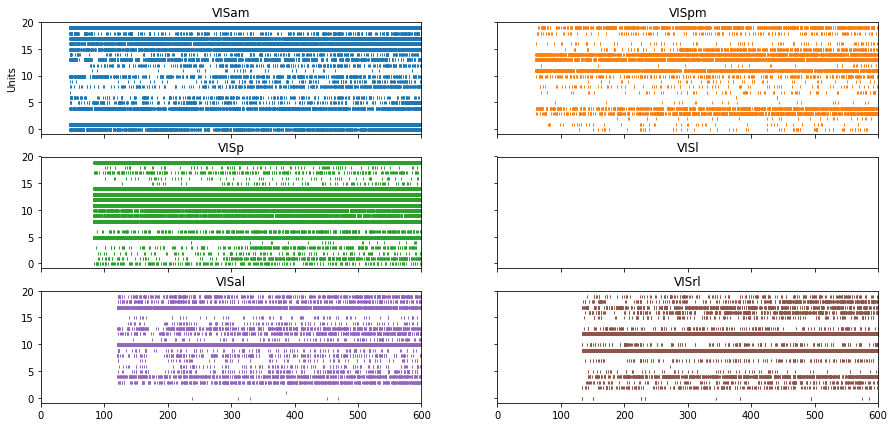

In [21]:
# Raster plot showing 20 units simultaneously recorded in each of 6 areas
areas = data_set.region_list

# Figure setup
fig,ax = plt.subplots(len(areas)/2,2,figsize=(15,7),sharex=True,sharey=True)
ax = ax.ravel()
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Loop over areas
for idx,area in enumerate(areas):
    area_spikes = data_set.spike_times[area]
    unit_list = area_spikes.keys()
    
    # Plot spike times for 20 units
    for i,unit in enumerate(unit_list[:20]):
        spike_times = area_spikes[unit]
        ax[idx].plot(spike_times,i*np.ones_like(spike_times),'|',color=colors[idx],markersize=3)
        ax[idx].set_title(area)
        
plt.xlim(0,600)
ax[0].set_ylabel('Units')

# 2. Visualization and analysis of stimulus-evoked activity

### Stimulus blocks

In [22]:
data_set.stim_blocks
# Need helper function(s) to return/display stimulus blocks in session

,start,end,stim type
0,201.662,1488.79,locally_sparse_noise_4deg
1,1488.79,2689.8,locally_sparse_noise_8deg
2,2689.8,3890.81,dense_noise_8deg
3,3890.81,4802.83,gabor_20_deg
4,4802.82,5091.82,spontaneous
5,5091.82,6342.39,drifting_gratings
6,6342.88,7831.71,natural_scenes
7,7831.69,7844.21,spontaneous
8,7844.21,9358.19,static_gratings
9,9358.19,10559.8,natural_movie_3


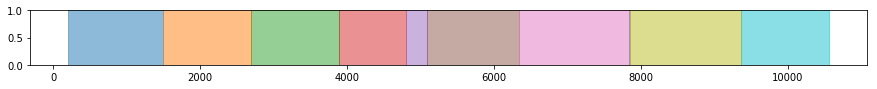

In [23]:
# Figure setup
fig,ax = plt.subplots(1,1,figsize=(15,1))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for idx,row in data_set.stim_blocks.iterrows():
    ax.axvspan(row.start,row.end,color=colors[idx],alpha=0.5)

** Exercise X.X: ** Plot stim_blocks for single-probe versus multi-probe experiment

### Stimulus table

* Stimulus presentation information is found in the stimulus table
* The stim table for each stimulus type is accessed via stim_tables dictionary
* The keys of stim_tables are names of the stimulus sets

In [24]:
data_set.stim_tables.keys()

['natural_movie_3',
 u'dense_noise_8deg_2',
 'gabor',
 u'locally_sparse_noise_4deg_0',
 'drifting_gratings',
 u'locally_sparse_noise_8deg_1',
 u'spontaneous',
 'static_gratings',
 'natural_scenes']

In [25]:
# Get the stim table for natural images
ni_table = data_set.stim_tables['natural_scenes']

In [26]:
ni_table.head()

,start,end,frame
0,6342.87692,6343.14141,30.0
1,6343.14141,6343.39195,98.0
2,6343.39195,6343.64130,52.0
3,6343.64130,6343.89175,110.0
4,6343.89175,6344.14246,79.0


**Task X.X:** How many presentations of image 46?

In [27]:
print(len(ni_table[ni_table.frame==46]))

50


### Trial-wise raster plot

* We'll now use the stim table to identify when image #46 was presented
* From this we'll extract spikes around each stimulus presentation
* Finally we'll make a raster plot showing spikes on each trial

In [28]:
# Select trials from stim table for specific image_id
image_id = 46
img = ni_table[ni_table.frame==image_id]
img.head(3) # this is the stim table for image 46

,start,end,frame
92,6365.91075,6366.16059,46.0
178,6387.42892,6387.67866,46.0
191,6390.68130,6390.93137,46.0


In [29]:
# Example units from area AL
area = 'VISal'
units = ['166','254','283','226','100']
all_spikes = data_set.spike_times[area]

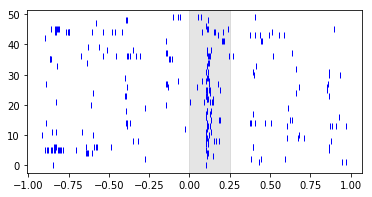

In [30]:
# Time before and after image presention
pre_time = 1.
post_time = 1.

# Get spike times from first unit in list
unit_spikes = all_spikes[units[0]]

# Make list containing spike train for each image presentation
all_trials = []
for i,start in enumerate(img.start):
    # Extract spikes around stimulus Start time
    spikes = unit_spikes[(unit_spikes > start-pre_time) & (unit_spikes <= start+post_time)]
    spikes = spikes - start
    all_trials.append(list(spikes))

# Figure setup
fig,ax = plt.subplots(1,1,figsize=(6,3))

# Make raster plot
for i,spikes in enumerate(all_trials):
    ax.plot(spikes,i*np.ones_like(spikes),'|',color='b')
    ax.invert_yaxis()

# Stimulus presentation window
stimulus_duration = img.end.values[0] - img.start.values[0]
ax.axvspan(0,stimulus_duration,color='gray',alpha=0.2);
    

**Exercise X.X:** Write a function to plot raster for a given unit and image. Use your function to plot rasters for 6 example units for image 46. 
* Function call: image_raster(img, unit_spikes, ax)
    * img: stim table for 1 image
    * unit_spikes: spike times for 1 unit
    * ax: axis handle
    
    
* Example units: ['166','254','283','226','100','63']

In [31]:
def image_raster(img,unit_spikes,ax=[]):
    if not ax:
        fig,ax = plt.subplots(1,1,figsize=(6,3))

    pre_time = .5
    post_time = .75

    all_trials = []
    # Get spike train for each trial
    for i,start in enumerate(img.start):
        spikes = unit_spikes[(unit_spikes > start-pre_time) & (unit_spikes < start+post_time)]
        spikes = spikes - start
        all_trials.append(list(spikes))

    # Plot each trial
    for i,spikes in enumerate(all_trials):
        ax.plot(spikes,i*np.ones_like(spikes),'|',color='b',markersize=4)
        ax.invert_yaxis()  
    ax.axvspan(0,0.25,color='gray',alpha=0.2);

    return ax

In [32]:
data_set.spike_times.keys()

['VISp', 'VISrl', 'VISal', 'VISam', 'VISpm', 'VISl']

(50, 0)

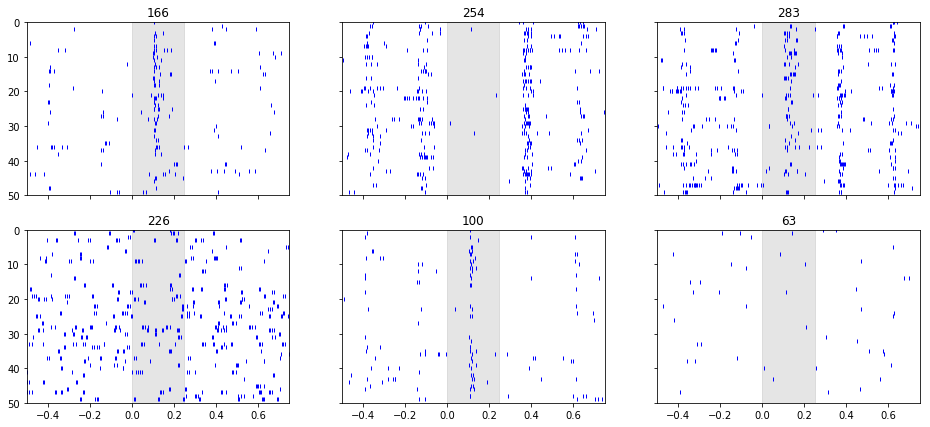

In [33]:
# Example units
area = 'VISal'
all_spikes = data_set.spike_times[area]
units = ['166','254','283','226','100','63']

# Image ID
image_id = 46
img = ni_table[ni_table.frame==image_id]

# Figure setup
fig,ax = plt.subplots(2,3,figsize=(16,7),sharex=True,sharey=True)
ax = ax.ravel()

for i,unit in enumerate(units):
    unit_spikes = all_spikes[unit]
    image_raster(img,unit_spikes,ax[i])
    ax[i].set_title(unit)
    
ax[0].set_xlim(-0.5,0.75)
ax[0].set_ylim(50,0)

### Peri-stimulus time histogram (PSTH)

Text about PSTH

In [34]:
# Example unit
unit = '100'

# Image ID
image_id = 46
img = ni_table[ni_table.frame==image_id]

# Get spike times for unit
unit_spikes = all_spikes[unit]

# Get spike train for each stimulus presentation trial
all_trials = []
for i,start in enumerate(img.start):
    spikes = unit_spikes[(unit_spikes > start-pre_time) & (unit_spikes < start+post_time)]
    spikes = spikes - start
    all_trials.append(list(spikes))

In [35]:
# Make PSTH for each trial with 5 ms bins
bins = np.arange(-1,1.01,0.005)
all_counts = []
for trial in all_trials:
    c,edges = np.histogram(trial,bins)
    c = c/np.diff(bins[0:2])
    all_counts.append(c)
centers = edges[:-1] + np.diff(bins)/2

Text(0.5,0,u'Time (s)')

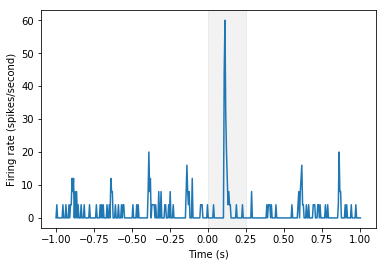

In [36]:
# Plot mean PSTH across trials
fig,ax = plt.subplots(1,1)
ax.plot(centers,np.mean(all_counts,axis=0))
ax.axvspan(0,0.25,color='gray',alpha=0.1)
ax.set_ylabel('Firing rate (spikes/second)')
ax.set_xlabel('Time (s)')

### Mean sweep response and tuning curves

#### Here we'll analyze responses to drifting gratings

In [37]:
# Get drifting gratings stim table
dg_stim = data_set.stim_tables['drifting_gratings']

# Select TF = 4.0
dg_stim = dg_stim[(dg_stim.temporal_frequency==4.0)]

# Get list of unique stimulus orientations
oris = sorted(dg_stim.orientation.unique())

** Task X.X **  TBD

In [38]:
# Example cells
area = 'VISal'
all_spikes = data_set.spike_times[area]
units = ['166','254','283','226','100','63']
unit_spikes = all_spikes[units[0]]

# Dictionary to store trial responses
trial_response = {}

# Window to compute firing rate
window = 0.25

# Dictionary to hold results
mean_sweep = {'Ori':[],'fr_mean':[],'fr_sem':[]}

# Loop over orientations
for ori in oris:
    tmp = dg_stim[dg_stim.orientation==ori]
    sc = []
    # Loop over trials/sweeps
    for i,start in enumerate(tmp.start):
        spikes = unit_spikes[(unit_spikes > start) & (unit_spikes <= start+window)]
        sc.append(len(spikes)/window)
    
    mean_sweep['Ori'].append(ori)
    mean_sweep['fr_mean'].append(np.mean(sc))
    mean_sweep['fr_sem'].append(np.std(sc)/np.sqrt(len(sc)))

Text(0.5,0,u'Orientation (degrees)')

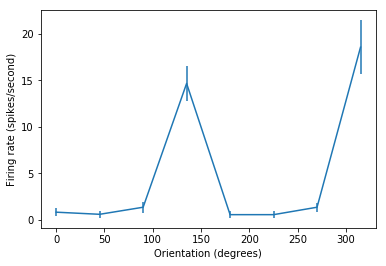

In [39]:
# plot tuning curve
plt.errorbar(x=mean_sweep['Ori'],y=mean_sweep['fr_mean'],yerr=mean_sweep['fr_sem'])
plt.ylabel('Firing rate (spikes/second)')
plt.xlabel('Orientation (degrees)')

**Exercise X.X** Compute tuning curve for static gratings. 

**Exercise X.X (Bonus)**  Plot rasters for each orientation of static and drifting gratings to compare temporal dynamics.

# 3. Correlations and cross-correlogram

### Correlation between two neurons

In [40]:
# get stimulus table 
dg_stim = data_set.stim_tables['drifting_gratings']

# Select TF = 4.0
dg_stim = dg_stim[(dg_stim.temporal_frequency==4.0)]

# get orientation conditions
oris = sorted(dg_stim.orientation.unique())

# get number of trials
n_trials = len(np.where(dg_stim.orientation.values==oris[0])[0])


In [41]:
# visulize dataframe
dg_stim.loc[dg_stim.orientation.values==oris[0]]

,start,end,temporal_frequency,spatial_frequency,orientation
3,5097.83018,5099.34620,4.0,0.04,0.0
13,5117.84650,5119.36322,4.0,0.04,0.0
153,5398.08236,5399.59871,4.0,0.04,0.0
179,5450.12608,5451.64245,4.0,0.04,0.0
184,5460.13448,5461.65085,4.0,0.04,0.0
212,5516.18159,5517.69802,4.0,0.04,0.0
362,5816.43419,5817.95043,4.0,0.04,0.0
386,5864.47445,5865.99083,4.0,0.04,0.0
419,5930.53013,5932.04679,4.0,0.04,0.0
427,5946.54359,5948.06003,4.0,0.04,0.0


In [42]:
# For given area:
area = 'VISal'
all_spikes = data_set.spike_times[area]

# Time window to compute firing rate
window = 0.25

# Example units
units = ['166','100']


# define mean response matrix with dimension: neuron*ori*trial
response = np.zeros([len(units), len(oris), n_trials])

# Loop over orientations

for idx_u, unit in enumerate(units):
    unit_spikes = all_spikes[unit]
    for idx_o, ori in enumerate(oris):
        tmp = dg_stim[dg_stim.orientation==ori]
        # Loop over trials/sweeps
        for idx, start in enumerate(tmp.start):
            spikes = unit_spikes[(unit_spikes > start) & (unit_spikes <= start+window)]
            # calculate firing rate spike/sec
            FR = len(spikes)/window
            
            response[idx_u, idx_o, idx]=FR

In [43]:
# check shape of output
response.shape

(2, 8, 15)

### Signal correlation: correlation among tuning curves

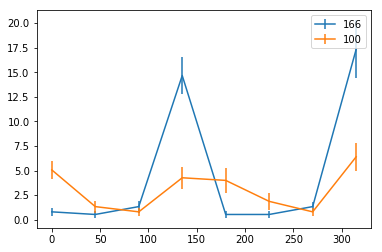

In [44]:
plt.figure()
tmp = response[0,:,:]
plt.errorbar(x=oris,y=tmp.mean(1),yerr=tmp.std(1)/np.sqrt(response.shape[2]), label=units[0])

tmp = response[1,:,:]
plt.errorbar(x=oris,y=tmp.mean(1),yerr=tmp.std(1)/np.sqrt(response.shape[2]), label=units[1])
plt.legend()

In [45]:
signal_corr = np.corrcoef(response.mean(2))[0,1]
print(signal_corr)

0.659789048249292


### Noise correlation: correlation across trials

Text(0,0.5,u'Mean FR: 100')

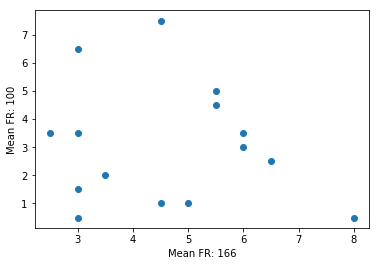

In [46]:
plt.figure()
ori=7
plt.scatter(response[0,:,:].mean(0), response[1,:,:].mean(0))
plt.xlabel('Mean FR: '+units[0])
plt.ylabel('Mean FR: '+units[1])

In [47]:
noise_corr = np.corrcoef(response.mean(1))[0,1]
print(noise_corr)

-0.13741776633839484


** Exercise X.X** Compute signal and noise correlation across all drifting grating stimulus parameters. Polot

### Cross-correlogram: fast timescale correlations

TODO: Brief description of topic

In [48]:
# Cross-correlogram (CCG)

def ccg(train1, train2, binrange, binsize):
    """
    Computes a cross-correlogram for two spike trains.

    Parameters
    ----------
    train1 : numpy array
        Primary spike train. Cross-correlogram will be computed relative to spikes in this spike train.
    train2 : numpy array
        Secondary spike train.
    binrange : tuple or list of length=2
        Window over which to compute cross correlogram.
    binsize : float
        Size of bins in cross-correlogram

    """
    
    nbins = int((binrange[1]-binrange[0])/binsize)
    
    diffs = [extract_local(train2,t1,binrange) for t1 in train1]
        
    diffs = np.hstack(diffs)
    diffs = diffs[diffs!=0]

    hist, edges = np.histogram(diffs, bins=nbins, range=binrange)
        
    return edges[1:]-binsize/2, hist /float(len(train1))*100

def extract_local(train2,t1,binrange):
    """
    Returns events in `train2` which are within `binrange` of `t1`, aligned to `t1`

    Parameters
    ----------
    train2 : numpy array
    t1 : float
    binrange : tuple or list of length=2

    """

    start = np.searchsorted(train2,t1 + binrange[0])
    end = np.searchsorted(train2,t1 + binrange[1])

    return train2[start:end] - t1

In [49]:
# task
unit_list = data_set.unit_list['VISp']

In [50]:
spt_0 = v1_spikes[unit_list[9]]
spt_1 = v1_spikes[unit_list[12]]

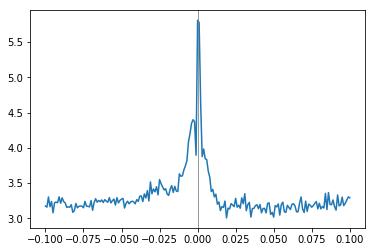

In [51]:
#Plot cross-correlogram between spike trains recorded from the two units

binsize = 0.001
ccg_win = [-0.1005,0.1005] #np.arange(-0.1005,0.1005,binsize)
ccg_centers,ccg_vals = ccg(spt_0,spt_1,ccg_win,binsize)
plt.figure()
plt.plot(ccg_centers,ccg_vals)
ax = plt.gca()
ax.axvline(ccg_centers[100],color='gray',linewidth = 0.8)
plt.show()

** Exercise X.X (Bonus): ** Write function to compute the "shuffle corrected CCG"

In [52]:
# Solution

# 4. Waveform and spike train analysis for cell classification

* Different cell types can show distinct extracellular action potential waveforms and firing patterns
* Here we will plot spike waveforms and inter-spike interval distributions for units in this experiment
* We will start by illustrating the classic RS and FS units division

### Spike waveforms: regular spiking (RS) and fast spiking (FS) units

In [53]:
# Need get_spike_waveforms function
spike_waveforms = data_set.get_waveforms()

Text(0.5,0,u'ms')

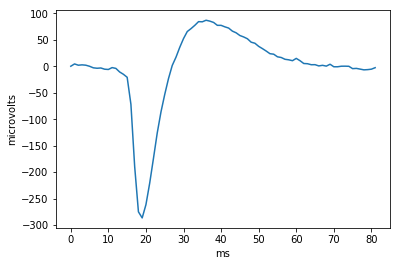

In [54]:
# Plot spike waveform for one unit
wv = spike_waveforms['probeB']['116']
plt.plot(wv)
plt.ylabel('microvolts')
plt.xlabel('ms')

** Exercise X.X: ** Compute spike duration for all units in this experiment and plot histogram of values.

In [55]:
# Concatenate waveforms into matrix
wv = []
for k,w in spike_waveforms.iteritems():
    for kk,ww in w.iteritems():
        wv.append(ww)  
wv = np.array(wv)

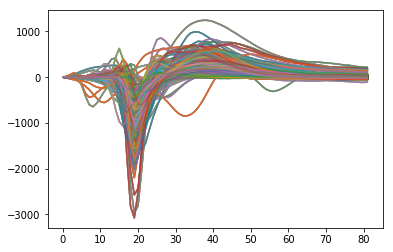

In [56]:
# Plot all waveforms in this data_set
fig,ax = plt.subplots(1,1,figsize=(6,4))
for w in wv:
    ax.plot(w,alpha=0.5)

In [57]:
# Compute trough to peak duration
duration = np.argmax(wv,axis=1) - np.argmin(wv,axis=1)
duration = 1/30000.*duration*1000 # Convert samples to ms

Text(0.5,0,u'Spike duration (ms)')

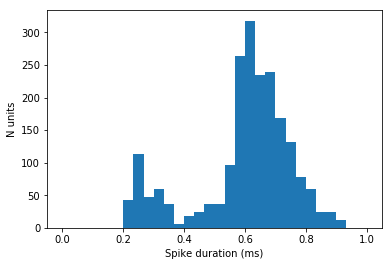

In [58]:
# Plot histogram of duration
plt.hist(duration,bins=30,range=(0,1));
plt.ylabel('N units')
plt.xlabel('Spike duration (ms)')

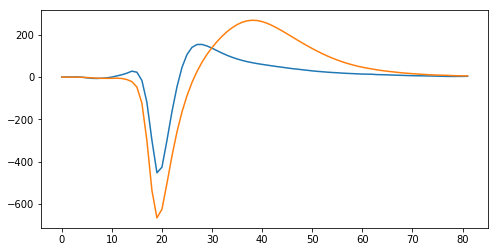

In [59]:
# Not yet complete. No waveform normalization yet. 
fs_idx = duration<0.4
rs_idx = duration>=0.4
fs = wv[fs_idx]
rs = wv[rs_idx]

fig,ax = plt.subplots(1,1,figsize=(8,4))
ax.plot(fs.mean(axis=0))
ax.plot(rs.mean(axis=0))

### Inter-spike interval (ISI) distributions and bursting
* Refractory period
* Bursting
* Oscillations

In [60]:
# Example units
area = 'VISal'
all_spikes = data_set.spike_times[area]
units = ['166','254','283','226','100','63']
unit_spikes = all_spikes['226']

** Task XX: ** Plot raster for this unit. Show spike train between 300 and 310 seconds

[300 305 310 315 320 325 330 335 340 345 350 355 360 365 370 375 380 385
 390 395]


Text(0.5,1,u'Spike train for 1 unit over first 10 minutes of experimental session')

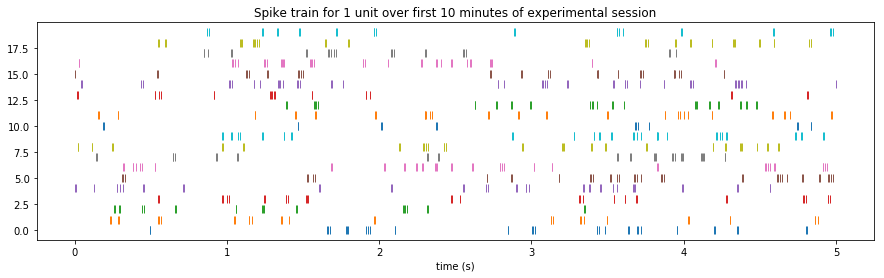

In [61]:
# Make raster plot of single unit spike train for first 600 seconds of recording
fig,ax = plt.subplots(1,1,figsize=(15,4))


t = (300,400)
window_length = 5 # 5 seconds
t = np.arange(t[0],t[1],window_length)
print t
for i,start in enumerate(t):
    spk = unit_spikes[(unit_spikes>start) & (unit_spikes<=start+window_length)]
    spk = spk - start
    ax.plot(spk,i*np.ones_like(spk),'|',markersize=8)
# ax.set_xlim(300,310)

ax.set_xlabel('time (s)')
ax.set_title('Spike train for 1 unit over first 10 minutes of experimental session')

In [62]:
# Compute inter-spike interval distribution for 1 unit
isi = np.diff(unit_spikes)*1000 # convert to ms
print(isi[:20])

[   6.36664909  317.6991228     5.36665185   17.73328437   13.93329486
 1219.6966323     5.53331806  107.73303587    5.36665185   16.03328906
  154.23290748    5.63331778   20.23327747  462.46538975    4.43332109
   53.46651904    7.99997791  100.56638899    5.36665185   97.53306403]


Text(0.5,0,u'Inter-spike interval (ms)')

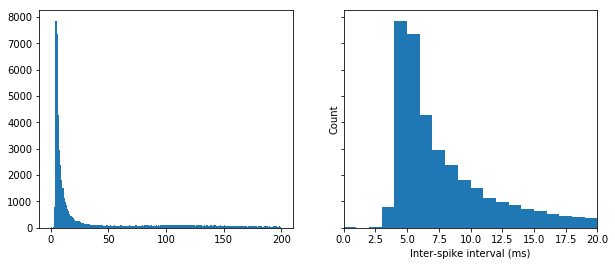

In [63]:
# Plot ISI distribution as histogram with 1 ms bins
fig,ax = plt.subplots(1,2,figsize=(10,4),sharey=True)
ax[0].hist(isi,bins=200,range=(0,200))
ax[1].hist(isi,bins=200,range=(0,200))
ax[1].set_xlim(0,20)
plt.ylabel('Count')
plt.xlabel('Inter-spike interval (ms)')

** Exercise X.X:**
1. Get spike times for 50 units with highest SNR and at least 3000 total spikes.
2. Plot ISI distribution for each unit
3. Do the ISI distributions vary between cells?

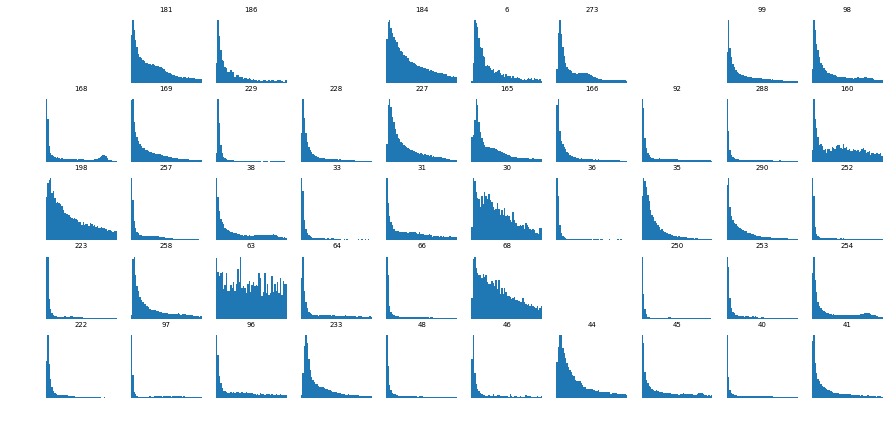

In [64]:
# Get spike times for 50 units with highest SNR and at least 3000 total spikes
unit_list = data_set.unit_list['VISal']
all_spikes = data_set.spike_times['VISal']
snr = np.ones_like(unit_list)
unit_list = unit_list[np.argsort(snr)][:50] # placeholder. Need SNR

# Figure setup
fig,ax = plt.subplots(5,10,figsize=(15,7),sharex=True)
ax = ax.ravel()

# Plot ISI distribution for each unit
for i,unit in enumerate(unit_list):
        unit_spikes = all_spikes[unit]
        if len(unit_spikes) > 3000:
            isi = np.diff(unit_spikes)
            ax[i].hist(isi,bins=50,range=(0,0.3))
            ax[i].set_title(str(unit_list[i]),fontsize=7)

plt.xlim(0,0.3)

for i in ax:
    i.axis('off')

** Task X.X: **

** Exercise X.X: **

# Project ideas

** 1. Characterize visual stimulus coding by burst spikes**
    * Many cortical cells fire action potential in bursts (ISI < 10 ms).
    * Do burst spikes have similar tuning compared to all spikes?
    * Is bursting stimulus-dependent?
    
** 2. Cell classification using multi-channel waveform, spiking pattern, functional interactions**
    * Extracellular recordings can reveal RS and FS classes. 
    * High-density Neuropixels probes pick up single cells on multiple channels and this information can be useful for cell classification. See biorxiv preprint: https://www.biorxiv.org/content/early/2018/07/25/376863.
    * Can units be clustered based on spiking pattern ('bursting' vs 'non-bursting')?
    * Can spiking pattern, waveform, and functional interaction features be combined to improve unsupervised clustering (e.g. k-means) for identifying cell classes?
    
    
** 3. Spike count variability as a function of timescale **
    * Long (100 of ms) versus short (1-10 ms)timescales 
    * 
    * 

** 4. Temporal dynamics of stimulus decodability**
    * How fast can stimuli be decoded from spiking populations? What is the timecourse of decodability in different areas and cortical layers?
    *
    *
    
** 5. Data visualization**
    * Visualize action potential backpropagation along the probe
    * Visualize spike patterns across shank of Neuropixels probe 
    * Visualize functional interaction network between layers and areas
    * Use dimensionality reduction to visualize spiking population dynamics in lower dimensional space

    
** 6. Image decoding using ephys vs ophys measurements**
    * 
    * 
    * 
    
